In [1]:
from cotacoes.cotacoes import busca_cotacoes, formata_cotacoes
from modelo.moneta import moneta_ag
from simbolos import simbolos
from datetime import datetime, timedelta, date
import yfinance as yf
import pandas as pd
import numpy as np
from math import log2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# Configurações para realização de um backteste
pais = "BR"
intervalo = "d"

data_inicial_bt = date(2019, 1, 1)
data_final_bt = date(2024, 6, 16)

In [3]:
# mais configurações para o backteste
cotacoes_anteriores = 200
cotacoes_segurar = 90
maiores_medias = 10

In [4]:
# quantidade de carteiras aleatórias que serão comparadas com o moneta
qtd_bebados = 10

In [5]:
# resgata todos os símbolos de ações do país selecionado
acoes_selecionadas = simbolos[pais][1:]
acoes_selecionadas

['ABEV3.SA',
 'AGRO3.SA',
 'ALPA3.SA',
 'ALUP11.SA',
 'ANIM3.SA',
 'ARZZ3.SA',
 'B3SA3.SA',
 'BAZA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BEES3.SA',
 'BHIA3.SA',
 'BMEB3.SA',
 'BNBR3.SA',
 'BRAP3.SA',
 'BRFS3.SA',
 'BRKM3.SA',
 'BRSR3.SA',
 'CCRO3.SA',
 'CEEB3.SA',
 'CGAS3.SA',
 'CIEL3.SA',
 'CLSC3.SA',
 'CMIG3.SA',
 'COCE3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE3.SA',
 'CSAN3.SA',
 'CSMG3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DASA3.SA',
 'DIRR3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENAT3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'ENGI3.SA',
 'EQPA3.SA',
 'EQTL3.SA',
 'EVEN3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'FRAS3.SA',
 'GGBR3.SA',
 'GOAU3.SA',
 'GRND3.SA',
 'GUAR3.SA',
 'HYPE3.SA',
 'ITSA3.SA',
 'ITUB3.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KEPL3.SA',
 'KLBN11.SA',
 'KLBN3.SA',
 'LEVE3.SA',
 'LIGT3.SA',
 'LOGN3.SA',
 'LREN3.SA',
 'MDIA3.SA',
 'MGLU3.SA',
 'MILS3.SA',
 'MOAR3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'MYPK3.SA',
 'ODPV3.S

In [6]:
if intervalo == "d":
    # se o intervalo for diário, deve-se subtrair 'cotacoes_anteriores' dias da data inicial de backtest
    # para puxar os dados apartir dessa data resultante da subtração
    data_minima = data_inicial_bt - timedelta(days=cotacoes_anteriores)

    # se o intervalo for diário, deve-se adicionar 'cotacoes_segurar' dias da data final de backtest
    # para puxar os dados até essa data resultante da adição
    data_maxima = data_final_bt + timedelta(days=cotacoes_segurar)
else:

    # se o intervalo for semanal, deve-se subtrair 'cotacoes_anteriores' semanas da data inicial de backtest
    # para puxar os dados apartir dessa data resultante da subtração
    data_minima = data_inicial_bt - timedelta(weeks=cotacoes_anteriores)

    # se o intervalo for semanal, deve-se adicionar 'cotacoes_segurar' semanas da data final de backtest
    # para puxar os dados até essa data resultante da adição
    data_maxima = data_final_bt + timedelta(weeks=cotacoes_segurar)

# mostra as datas de início e fim de puxar os dados para o backteste
data_minima, data_maxima

(datetime.date(2018, 6, 15), datetime.date(2024, 9, 14))

In [7]:
# busca os dados de cotações das ações selecionadas no intervalo de datas definido
cotacoes = busca_cotacoes(
    simbolos=acoes_selecionadas,
    intervalo=intervalo,
    data_inicio=data_minima.strftime("%Y-%m-%d"),
    data_fim=data_maxima.strftime("%Y-%m-%d")
)

[*********************100%%**********************]  114 of 114 completed


In [8]:
todas_acoes = cotacoes.columns
todas_acoes

Index(['ABEV3.SA', 'AGRO3.SA', 'ALPA3.SA', 'ALUP11.SA', 'ANIM3.SA', 'ARZZ3.SA',
       'B3SA3.SA', 'BAZA3.SA', 'BBAS3.SA', 'BBDC3.SA',
       ...
       'UGPA3.SA', 'UNIP3.SA', 'USIM3.SA', 'VALE3.SA', 'VIVT3.SA', 'VLID3.SA',
       'VULC3.SA', 'WEGE3.SA', 'WHRL3.SA', 'YDUQ3.SA'],
      dtype='object', name='Ticker', length=114)

In [9]:
# ultimas cotações...
cotacoes.tail()

Ticker,ABEV3.SA,AGRO3.SA,ALPA3.SA,ALUP11.SA,ANIM3.SA,ARZZ3.SA,B3SA3.SA,BAZA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,UNIP3.SA,USIM3.SA,VALE3.SA,VIVT3.SA,VLID3.SA,VULC3.SA,WEGE3.SA,WHRL3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-18,11.67,27.790001,8.92,31.350000,3.55,52.580002,11.17,94.510002,27.190001,11.50,...,22.570000,50.119999,7.79,61.169998,49.389999,16.080000,15.80,47.400002,4.51,11.51
2024-07-19,11.73,27.870001,9.13,31.209999,3.48,52.290001,11.17,92.000000,27.110001,11.46,...,23.219999,50.639999,7.96,61.119999,49.029999,16.420000,15.62,47.290001,4.44,11.30
2024-07-22,11.81,27.330000,8.83,31.500000,3.59,53.430000,11.29,92.989998,27.139999,11.54,...,23.080000,51.049999,8.01,61.049999,49.570000,17.139999,15.64,47.169998,4.44,11.45
2024-07-23,11.78,26.950001,8.67,31.219999,3.45,52.610001,11.18,92.000000,26.980000,11.39,...,22.830000,50.200001,7.70,60.230000,48.570000,17.299999,15.10,47.049999,4.43,11.02
2024-07-24,11.79,26.840000,8.52,31.250000,3.40,51.700001,11.03,92.309998,26.870001,11.37,...,22.770000,50.200001,7.56,60.599998,49.090000,16.750000,15.07,46.650002,NaN,10.64


In [10]:
# resgata o simbolo do indice do país selecionado
simbolo_index = simbolos[pais][0]
simbolo_index

'BOVA11.SA'

In [11]:
# busca os dados de cotações do índice do país selecionado no intervalo de datas definido
cotacoes_index = busca_cotacoes(
    simbolos=[simbolo_index],
    intervalo=intervalo,
    data_inicio=data_minima.strftime("%Y-%m-%d"),
    data_fim=data_maxima.strftime("%Y-%m-%d")
)
cotacoes_index.head()

[*********************100%%**********************]  1 of 1 completed


Date
2018-06-15    68.110001
2018-06-18    67.519997
2018-06-19    68.809998
2018-06-20    69.510002
2018-06-21    67.660004
Name: Adj Close, dtype: float64

In [12]:
# verifica as datas comuns entre as cotações das ações e do índice
datas_comuns = cotacoes.index.intersection(cotacoes_index.index)
datas_comuns

DatetimeIndex(['2018-06-15', '2018-06-18', '2018-06-19', '2018-06-20',
               '2018-06-21', '2018-06-22', '2018-06-25', '2018-06-26',
               '2018-06-27', '2018-06-28',
               ...
               '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18', '2024-07-19', '2024-07-22',
               '2024-07-23', '2024-07-24'],
              dtype='datetime64[ns]', name='Date', length=1503, freq=None)

In [13]:
# filtra as cotações das ações e do índice para as datas comuns
cotacoes = cotacoes.loc[datas_comuns]
cotacoes_index = cotacoes_index.loc[datas_comuns]

In [14]:
# note que ambas possuem o mesmo número de linhas agora
cotacoes.shape, cotacoes_index.shape

((1503, 114), (1503,))

In [15]:
# antes dos backtestes, as listas abaixo são criadas vazias para armazenar os resultados
# de cada iteração (carteira moneta) do backtest
resultados_moneta = []
resultados_index = []
resultados_bebados = []

In [16]:
# a data de rodar o moneta, inicialmente, é a data inicial do backtest
data_rodar_moneta = data_inicial_bt
data_rodar_moneta

datetime.date(2019, 1, 1)

In [17]:
if intervalo == "d":
    # se o intervalo for diário, a data inicial para filtrar os dados de cotação das ações
    # para, posteriormente rodar o moneta é a data de rodar o moneta menos 'cotacoes_anteriores' dias
    data_inicial_moneta = \
        (data_rodar_moneta - timedelta(days=cotacoes_anteriores))


    # se o intervalo for diario, a data final para testar a carteira moneta é a data de rodar 
    # o moneta mais 'cotacoes_segurar' dias    
    data_final_testar_carteira = \
        (data_rodar_moneta + timedelta(days=cotacoes_segurar))
else:

    # se o intervalo for semanal, a data inicial para filtrar os dados de cotação das ações
    # para, posteriormente rodar o moneta é a data de rodar o moneta menos 'cotacoes_anteriores' semanas
    data_inicial_moneta = \
        (data_rodar_moneta - timedelta(weeks=cotacoes_anteriores))
    
    # se o intervalo for semanal, a data final para testar a carteira moneta é a data de rodar
    data_final_testar_carteira = \
        (data_rodar_moneta + timedelta(weeks=cotacoes_segurar))

# mostra as datas acima
data_inicial_moneta, data_final_testar_carteira

(datetime.date(2018, 6, 15), datetime.date(2019, 4, 1))

In [21]:
# copia as cotações para rodar o moneta
cotacoes_rodar_moneta = cotacoes.loc[data_inicial_moneta:data_rodar_moneta].copy()

# formata as cotações para rodar o moneta para o intervalo selecionado e para o número de médias móveis
# escolhido
variacoes_rodar_moneta = formata_cotacoes(cotacoes=cotacoes_rodar_moneta, 
                                            intervalo=intervalo, 
                                            maiores_medias=maiores_medias)

variacoes_rodar_moneta

Ticker,TASA3.SA,LOGN3.SA,CMIG3.SA,MILS3.SA,EQPA3.SA,ELET3.SA,BBAS3.SA,JHSF3.SA,TGMA3.SA,GUAR3.SA
Date,,,,,,,,,,
2018-06-18,0.010695,0.101796,-0.011308,-0.029412,0.032258,-0.000769,-0.019199,-0.027027,-0.035692,-0.023519
2018-06-19,0.005291,0.070652,0.021242,0.040404,0.000000,0.031563,0.070147,0.009259,0.077922,0.027097
2018-06-20,0.010526,-0.025381,0.003200,0.000000,0.037500,0.007463,0.028963,0.055046,0.000000,-0.021148
2018-06-21,0.000000,-0.033854,-0.038278,-0.014563,-0.072289,-0.082963,-0.036667,-0.017391,-0.036747,-0.026738
2018-06-22,-0.052083,0.040431,0.003317,0.004926,0.038961,0.039580,0.003460,0.008849,-0.024390,0.049890
...,...,...,...,...,...,...,...,...,...,...
2018-12-20,-0.084967,-0.002558,0.076233,-0.005465,-0.026316,-0.029412,0.006393,-0.030769,-0.004174,0.003476
2018-12-21,0.002381,-0.012821,0.005556,0.115385,-0.013513,-0.017316,0.000227,-0.068783,0.019055,0.008406
2018-12-26,0.040380,-0.063636,0.003070,-0.029557,-0.018265,-0.012335,0.006577,0.034091,-0.016455,-0.015371


In [19]:
acoes = variacoes_rodar_moneta.columns
acoes

Index(['TASA3.SA', 'LOGN3.SA', 'CMIG3.SA', 'MILS3.SA', 'EQPA3.SA', 'ELET3.SA',
       'BBAS3.SA', 'JHSF3.SA', 'TGMA3.SA', 'GUAR3.SA'],
      dtype='object', name='Ticker')

In [20]:
# copia as cotações para testar a carteira moneta
cotacoes_testar_carteira = cotacoes.loc \
            [data_rodar_moneta:min(data_final_bt, data_final_testar_carteira), acoes].copy()

# formata as cotações para testar a carteira moneta para o intervalo selecionado e para o número de médias móveis
variacoes_testar_carteira = formata_cotacoes(cotacoes=cotacoes_testar_carteira, 
                                                    intervalo=intervalo, 
                                                    maiores_medias=0)

variacoes_testar_carteira

Ticker,TASA3.SA,LOGN3.SA,CMIG3.SA,MILS3.SA,EQPA3.SA,ELET3.SA,BBAS3.SA,JHSF3.SA,TGMA3.SA,GUAR3.SA
Date,,,,,,,,,,
2019-01-03,0.428571,0.022140,-0.021154,0.002353,-0.013158,0.276245,0.004115,-0.010000,0.009223,-0.038345
2019-01-04,-0.208738,0.008424,0.023576,0.011737,0.017778,-0.015161,0.000000,-0.020202,0.008788,-0.016793
2019-01-07,-0.153374,-0.015513,-0.033909,0.041763,0.082969,-0.050115,-0.006557,0.025773,-0.009059,0.026802
2019-01-08,0.166667,-0.036364,-0.000662,-0.015590,-0.048387,0.051035,-0.011344,-0.005025,-0.008087,-0.012210
2019-01-09,0.060870,-0.038994,0.007952,0.004525,0.000000,0.003937,-0.002712,-0.035354,0.002836,0.020686
2019-01-10,-0.009368,0.022251,0.028271,-0.004504,-0.004237,0.013072,0.014644,0.010471,0.000353,0.014520
2019-01-11,-0.007092,-0.011524,0.012148,-0.006787,0.008511,-0.001290,0.004124,0.010363,0.000000,-0.006821
2019-01-14,0.059524,0.007772,0.032849,0.034168,0.000000,-0.000646,0.023203,-0.005128,0.007067,-0.014963
2019-01-15,0.111236,0.025707,-0.009174,0.079295,-0.008439,-0.027796,-0.011640,-0.020619,-0.028070,0.004233


In [22]:
# copia as cotações do índice para comparar com o teste do moneta
cotacoes_index_testar = cotacoes_index.loc[data_rodar_moneta:min(data_final_bt, data_final_testar_carteira)].copy()

# formata as cotações do índice para o intervalo selecionado
variacoes_index_testar = formata_cotacoes(cotacoes=pd.DataFrame(cotacoes_index_testar),
                                                intervalo=intervalo,
                                                maiores_medias=0)

variacoes_index_testar

,Adj Close
Date,
2019-01-03,0.001138
2019-01-04,0.005682
2019-01-07,-0.000226
2019-01-08,0.003956
2019-01-09,0.016774
2019-01-10,0.001107
2019-01-11,-0.000442
2019-01-14,0.009183
2019-01-15,-0.006578


In [23]:
# roda o moneta com dados de rodar o modelo "passado"
carteira = moneta_ag(variacoes=variacoes_rodar_moneta)
carteira

TASA3.SA        0.003407
LOGN3.SA        0.061787
CMIG3.SA        0.117533
MILS3.SA        0.078520
EQPA3.SA        0.060725
ELET3.SA        0.000017
BBAS3.SA        0.000080
JHSF3.SA        0.156501
TGMA3.SA        0.161842
GUAR3.SA        0.359589
Retornos        1.003693
Riscos          0.000300
Fitnesses    3348.447978
Name: 39, dtype: float64

In [24]:
# transforma o retorno para um retorno esperado com a função logarítmica
# o pdf 'convertendo_retorno_risco.pdf' explica o porquê
retorno_esperado = log2(carteira.loc["Retornos"])
retorno_esperado

0.005317715409531241

In [25]:
# calcula o retorno esperado para o período de 'cotacoes_segurar' dias
(1 + retorno_esperado) ** cotacoes_segurar - 1

0.6117593813898528

In [26]:
# resgata o risco esperado da carteira
risco_esperado = carteira.loc["Riscos"]
risco_esperado

np.float64(0.0002997486499836621)

In [27]:
# resgata a carteira resultante para os dados anteriores
carteira = carteira.loc[acoes]
carteira

Ticker
TASA3.SA    0.003407
LOGN3.SA    0.061787
CMIG3.SA    0.117533
MILS3.SA    0.078520
EQPA3.SA    0.060725
ELET3.SA    0.000017
BBAS3.SA    0.000080
JHSF3.SA    0.156501
TGMA3.SA    0.161842
GUAR3.SA    0.359589
Name: 39, dtype: float64

In [28]:
# confere a somatória dos percentuais da carteira
carteira.sum()

np.float64(0.9999999999999999)

In [29]:
# computando os retornos da carteira nos dados de teste 'futuro'
retornos_moneta = variacoes_testar_carteira.dot(carteira)
retornos_moneta

Date
2019-01-03   -0.014128
2019-01-04   -0.003197
2019-01-07    0.015055
2019-01-08   -0.012405
2019-01-09    0.001453
2019-01-10    0.010973
2019-01-11   -0.000155
2019-01-14    0.002189
2019-01-15    0.000354
2019-01-16    0.006743
2019-01-17    0.016205
2019-01-18   -0.005387
2019-01-21    0.010097
2019-01-22   -0.016087
2019-01-23    0.000190
2019-01-24    0.012705
2019-01-28    0.008212
2019-01-29    0.000966
2019-01-30   -0.007918
2019-01-31   -0.018637
2019-02-01    0.011617
2019-02-04    0.000848
2019-02-05   -0.005667
2019-02-06   -0.021797
2019-02-07   -0.005137
2019-02-08    0.006319
2019-02-11   -0.000384
2019-02-12    0.003977
2019-02-13    0.000864
2019-02-14    0.017608
2019-02-15    0.009318
2019-02-19    0.016747
2019-02-20   -0.023595
2019-02-25    0.003392
2019-02-26   -0.006421
2019-02-27    0.007723
2019-03-06   -0.022205
2019-03-08    0.023325
2019-03-12    0.009163
2019-03-13   -0.000829
2019-03-21    0.006981
2019-03-25   -0.036399
2019-03-26    0.012327
2019-0

<Axes: xlabel='Date'>

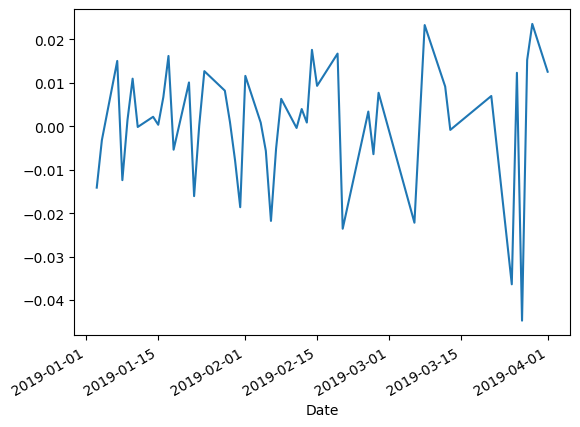

In [30]:
# mostrando graficamente os retornos periódicos da carteira moneta no período de teste
retornos_moneta.plot()

<Axes: xlabel='Date'>

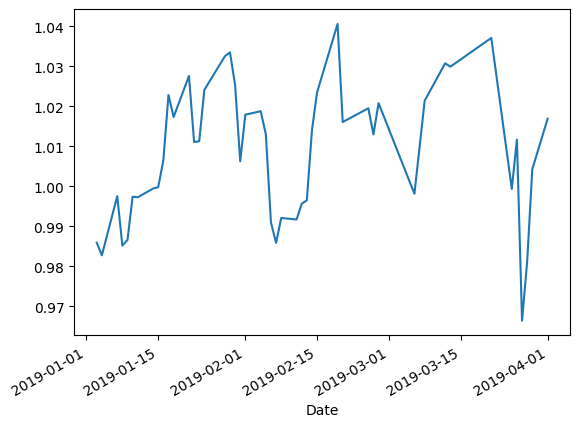

In [31]:
# computando e mostrando graficamente os retornos acumulados da carteira moneta no período de teste
(1 + retornos_moneta).cumprod().plot()

In [32]:
# computando e guardando o retorno periódico do indice BOVA/S&P500 no período de teste
retornos_index = variacoes_index_testar["Adj Close"]
retornos_index

Date
2019-01-03    0.001138
2019-01-04    0.005682
2019-01-07   -0.000226
2019-01-08    0.003956
2019-01-09    0.016774
2019-01-10    0.001107
2019-01-11   -0.000442
2019-01-14    0.009183
2019-01-15   -0.006578
2019-01-16    0.005960
2019-01-17    0.008996
2019-01-18    0.006959
2019-01-21    0.000324
2019-01-22   -0.013385
2019-01-23    0.018600
2019-01-24    0.011493
2019-01-28   -0.022194
2019-01-29    0.001195
2019-01-30    0.014427
2019-01-31    0.005133
2019-02-01    0.003830
2019-02-04    0.007100
2019-02-05   -0.002420
2019-02-06   -0.037236
2019-02-07   -0.002958
2019-02-08    0.007692
2019-02-11   -0.007743
2019-02-12    0.016046
2019-02-13    0.001623
2019-02-14    0.018790
2019-02-15   -0.003180
2019-02-19   -0.002765
2019-02-20   -0.006505
2019-02-25    0.006440
2019-02-26    0.003733
2019-02-27   -0.002975
2019-03-06   -0.032822
2019-03-08    0.012010
2019-03-12    0.027763
2019-03-13    0.009640
2019-03-21   -0.024132
2019-03-25   -0.028599
2019-03-26    0.017266
2019-0

<Axes: xlabel='Date'>

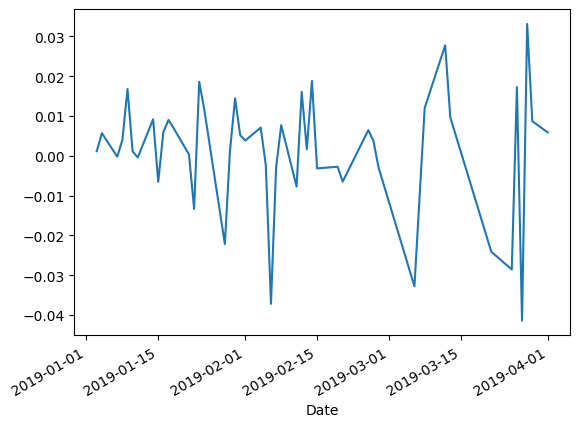

In [33]:
# mostrando graficamente os retornos periódicos do índice BOVA/S&P500 no período de teste
retornos_index.plot()

<Axes: xlabel='Date'>

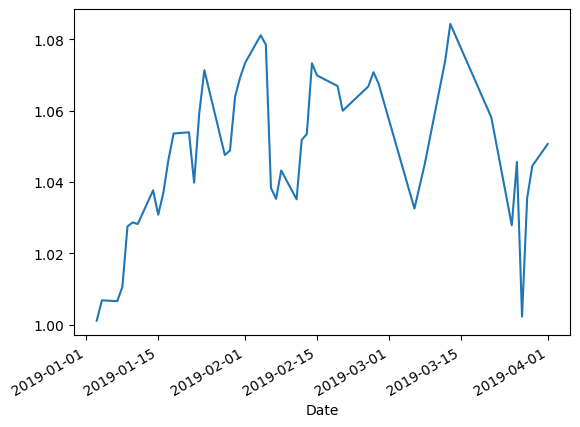

In [34]:
# computando e mostrando graficamente os retornos acumulados do índice BOVA/S&P500 no período de teste
(1 + retornos_index).cumprod().plot()

In [35]:
# computado o retorno esperado da carteira moneta no período de teste
retorno_esperado_periodo = \
    (1 + retorno_esperado) ** \
        (data_final_testar_carteira - data_rodar_moneta).days - 1
retorno_esperado_periodo

0.6117593813898528

In [36]:
# registrando os resultados da carteira moneta
resultados_moneta.append(
    {
        "data_inicio": data_rodar_moneta,
        "data_fim": data_final_testar_carteira,
        "carteira": carteira,
        "retornos": retornos_moneta,
        "retorno_esperado": retorno_esperado_periodo
    }
)

In [37]:
# registrando os resultados do índice BOVA/S&P500
resultados_index.append(
    {
        "data_inicio": data_rodar_moneta,
        "data_fim": data_final_testar_carteira,
        "retornos": retornos_index
    }
)

In [38]:
def gerar_carteira_aleatoria(acoes, seed=None):

    """
    acoes: lista de ações
    seed: semente para geração de números aleatórios
    Esta função gera uma carteira aleatória com pesos aleatórios para cada ação
    """

    if seed:
        np.random.seed(seed)
    
    n_acoes = np.random.randint(1, len(acoes) + 1)

    acoes_escolhidas = np.random.choice(acoes, size=n_acoes, replace=False)
    sorteio = np.random.randint(1, 11, size=n_acoes)
    percentuais = sorteio / sorteio.sum()
    return pd.Series(percentuais, index=acoes_escolhidas)

In [42]:
bebados = []
for _ in range(qtd_bebados):

    # gera uma carteira aleatória
    carteira_aleatoria = gerar_carteira_aleatoria(acoes=todas_acoes, seed=None)

    # resgata as ações da carteira aleatória
    acoes_aleatorias = carteira_aleatoria.index

    # copia as cotações para testar a carteira aleatória
    cotacoes_testar_bebado = cotacoes.loc[data_rodar_moneta:min(data_final_bt, data_final_testar_carteira), 
                                          acoes_aleatorias].copy()

    # formata as cotações para testar a carteira aleatória para o intervalo selecionado
    variacoes_testar_bebado = formata_cotacoes(cotacoes=cotacoes_testar_bebado,
                                            intervalo=intervalo,
                                            maiores_medias=0)
    
    # computando os retornos periódicos da carteira aleatória nos dados de teste 'futuro'
    retornos_bebado = variacoes_testar_bebado.dot(carteira_aleatoria)

    # registrando os resultados da carteira aleatória
    dados_bebado = {"data_inicio": data_rodar_moneta,
                    "data_fim": data_final_testar_carteira,
                    "carteira": carteira_aleatoria,
                    "retornos": retornos_bebado}
    
    bebados.append(dados_bebado)

In [43]:
len(bebados)

10

In [44]:
# mostrando a data que o moneta foi rodado
data_rodar_moneta

datetime.date(2019, 1, 1)

In [45]:
# mostrando a data final de testar a carteira gerada pelo moneta
data_final_testar_carteira

datetime.date(2019, 4, 1)

In [46]:
if intervalo == "d":
    # se o intervalo for diário, a data de rodar o moneta é a data final de testar a carteira mais 1 dia
    data_rodar_moneta = \
    data_final_testar_carteira + timedelta(days=1)
else:
    # se o intervalo for semanal, a data de rodar o moneta é a data final de testar a carteira mais 1 semana
    data_rodar_moneta = \
    data_final_testar_carteira + timedelta(weeks=1)

data_rodar_moneta

datetime.date(2019, 4, 2)

In [47]:
from utilidades.gerais import gerar_data, gerar_carteira_aleatoria

In [48]:
# juntando os códigos acima em um único bloco de código e incluíndo o loop para rodar o 
# os backtestes do moneta até a data final de backteste

cotacoes_segurar = 90

resultados_moneta = []
resultados_index = []
resultados_bebados = []
data_rodar_moneta = data_inicial_bt

todas_acoes = cotacoes.columns

variacoes = cotacoes.pct_change().dropna()

while data_rodar_moneta < data_final_bt:
    data_inicial_moneta = gerar_data(data_rodar_moneta, 
                                        cotacoes_anteriores, 
                                        intervalo, 
                                        "anterior")

    data_final_testar_carteira = gerar_data(data_rodar_moneta, 
                                            cotacoes_segurar, 
                                            intervalo, 
                                            "posterior")

    cotacoes_rodar_moneta = cotacoes.loc[data_inicial_moneta:data_rodar_moneta].copy()
    variacoes_rodar_moneta = formata_cotacoes(cotacoes=cotacoes_rodar_moneta, 
                                                intervalo=intervalo, 
                                                maiores_medias=maiores_medias)
    acoes = variacoes_rodar_moneta.columns
    carteira = moneta_ag(variacoes=variacoes_rodar_moneta)
    retorno_esperado = log2(carteira.loc["Retornos"])
    carteira = carteira.loc[acoes]

    cotacoes_testar_carteira = cotacoes.loc \
        [data_rodar_moneta:min(data_final_bt, data_final_testar_carteira), acoes].copy()
    
    variacoes_testar_carteira = formata_cotacoes(cotacoes=cotacoes_testar_carteira, 
                                                intervalo=intervalo, 
                                                maiores_medias=0)
    retornos_moneta = variacoes_testar_carteira.dot(carteira)

    cotacoes_index_testar = cotacoes_index.loc[data_rodar_moneta:min(data_final_bt, data_final_testar_carteira)].copy()

    variacoes_index_testar = formata_cotacoes(cotacoes=pd.DataFrame(cotacoes_index_testar),
                                            intervalo=intervalo,
                                            maiores_medias=0)
    retornos_index = variacoes_index_testar["Adj Close"]

    retorno_esperado_periodo = \
                (1 + retorno_esperado) ** \
                (data_final_testar_carteira - data_rodar_moneta).days - 1
    resultados_moneta.append(
        {
            "data_inicio": data_rodar_moneta,
            "data_fim": data_final_testar_carteira,
            "carteira": carteira,
            "retornos": retornos_moneta,
            "retorno_esperado": retorno_esperado_periodo
        }
    )

    resultados_index.append(
        {
            "data_inicio": data_rodar_moneta,
            "data_fim": data_final_testar_carteira,
            "retornos": retornos_index
        }
    )

    bebados = []
    for _ in range(qtd_bebados):
        carteira_aleatoria = gerar_carteira_aleatoria(acoes=todas_acoes, seed=None)
        acoes_aleatorias = carteira_aleatoria.index

        cotacoes_testar_bebado = cotacoes.loc[data_rodar_moneta:min(data_final_bt, data_final_testar_carteira), 
                                              acoes_aleatorias].copy()
        
        variacoes_testar_bebado = formata_cotacoes(cotacoes=cotacoes_testar_bebado,
                                                intervalo=intervalo,
                                                maiores_medias=0)
        
        retornos_bebado = variacoes_testar_bebado.dot(carteira_aleatoria)

        dados_bebado = {"data_inicio": data_rodar_moneta,
                        "data_fim": data_final_testar_carteira,
                        "carteira": carteira_aleatoria,
                        "retornos": retornos_bebado}
        
        bebados.append(dados_bebado)

    resultados_bebados.append(bebados)

    data_rodar_moneta = gerar_data(data_final_testar_carteira, 1, 
                                    intervalo, "posterior")
    
    print(data_rodar_moneta)

C:\Users\igorm\AppData\Local\Temp\ipykernel_9972\3994304355.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  variacoes = cotacoes.pct_change().dropna()


2019-04-02
2019-07-02
2019-10-01
2019-12-31
2020-03-31
2020-06-30
2020-09-29
2020-12-29
2021-03-30
2021-06-29
2021-09-28
2021-12-28
2022-03-29
2022-06-28
2022-09-27
2022-12-27
2023-03-28
2023-06-27
2023-09-26
2023-12-26
2024-03-26
2024-06-25


In [49]:
# numero de carteiras geradas dentro do período de backteste
len(resultados_moneta)

22

In [51]:
# mostrando os retornos periódicos para a primeira carteira gerada pelo moneta
resultados_moneta[0]["retornos"]

Date
2019-01-03   -0.012791
2019-01-04   -0.001661
2019-01-07    0.014289
2019-01-08   -0.013480
2019-01-09   -0.000150
2019-01-10    0.011197
2019-01-11   -0.000603
2019-01-14    0.003859
2019-01-15    0.003750
2019-01-16    0.010881
2019-01-17    0.018091
2019-01-18   -0.005963
2019-01-21    0.010830
2019-01-22   -0.018043
2019-01-23   -0.002478
2019-01-24    0.012683
2019-01-28    0.009133
2019-01-29    0.002881
2019-01-30   -0.007689
2019-01-31   -0.017259
2019-02-01    0.009942
2019-02-04    0.000243
2019-02-05   -0.005900
2019-02-06   -0.021453
2019-02-07   -0.004522
2019-02-08    0.006588
2019-02-11    0.000625
2019-02-12    0.007576
2019-02-13    0.001893
2019-02-14    0.015448
2019-02-15    0.011723
2019-02-19    0.015899
2019-02-20   -0.022329
2019-02-25    0.002289
2019-02-26   -0.007317
2019-02-27    0.006828
2019-03-06   -0.022680
2019-03-08    0.019148
2019-03-12    0.008410
2019-03-13    0.000844
2019-03-21    0.010337
2019-03-25   -0.033864
2019-03-26    0.009658
2019-0

In [ ]:
# mostrando os retornos acumulados para a segunda carteira gerada pelo moneta
resultados_moneta[1]["retornos"]

In [52]:
# essa célula foi criada para percorrer os dados das carteiras do moneta e do indice para
# juntar todos os retornos em uma única série

retornos_jungidos_moneta = pd.Series(data=[0], index=[data_inicial_bt])
retornos_jungidos_index = pd.Series(data=[0], index=[data_inicial_bt])
i = 0
while i < len(resultados_moneta):

    retornos_moneta_jogo = \
        resultados_moneta[i]["retornos"]
    
    retornos_index_jogo = \
        resultados_index[i]["retornos"]
    
    retornos_jungidos_moneta = pd.concat([retornos_jungidos_moneta, retornos_moneta_jogo])
    retornos_jungidos_index = pd.concat([retornos_jungidos_index, retornos_index_jogo])

    i += 1

In [53]:
# mostrando a média dos retornos periódicos do moneta para todos os dados de backteste
retornos_jungidos_moneta.mean()

np.float64(0.0008450489305026217)

<Axes: >

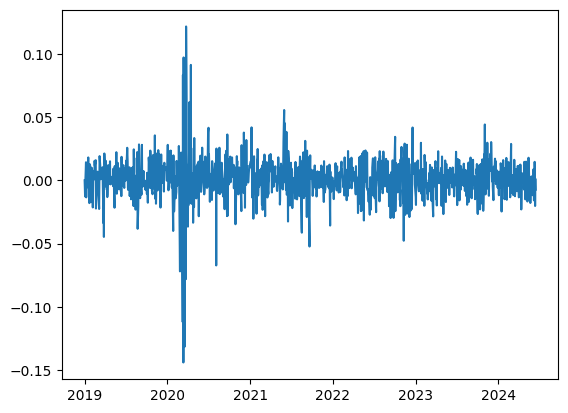

In [54]:
# mostrando graficamente os retornos periódicos do moneta para todos os dados de backteste
retornos_jungidos_moneta.plot()

In [55]:
# computando os resultados acumulados dos retornos periódicos do moneta
resultados_acumulados_moneta = (1 + retornos_jungidos_moneta).cumprod()
resultados_acumulados_moneta

2019-01-01             1.000000
2019-01-03 00:00:00    0.987209
2019-01-04 00:00:00    0.985569
2019-01-07 00:00:00    0.999652
2019-01-08 00:00:00    0.986176
                         ...   
2024-06-10 00:00:00    2.613116
2024-06-11 00:00:00    2.633714
2024-06-12 00:00:00    2.580224
2024-06-13 00:00:00    2.583450
2024-06-14 00:00:00    2.564194
Length: 1321, dtype: float64

<Axes: >

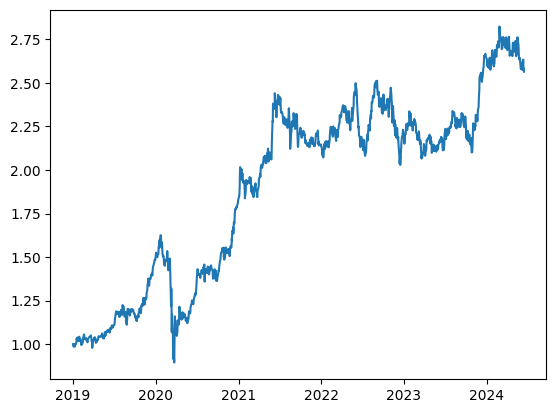

In [56]:
# mostrando graficamente os resultados acumulados dos retornos periódicos do moneta
resultados_acumulados_moneta.plot()

In [57]:
# computando os resultados acumulados dos retornos periódicos do índice
resultados_acumulados_index = (1 + retornos_jungidos_index).cumprod()
resultados_acumulados_index

2019-01-01             1.000000
2019-01-03 00:00:00    1.001138
2019-01-04 00:00:00    1.006826
2019-01-07 00:00:00    1.006598
2019-01-08 00:00:00    1.010580
                         ...   
2024-06-10 00:00:00    1.437792
2024-06-11 00:00:00    1.445756
2024-06-12 00:00:00    1.426887
2024-06-13 00:00:00    1.423457
2024-06-14 00:00:00    1.423947
Length: 1321, dtype: float64

In [58]:
# a célula foi criada para percorrer os dados das carteiras aleatórias e juntar todos os retornos
# em uma única série para cada carteira aleatória (bebado)

bebados_jungidos = []
for j in range(qtd_bebados):
    
    retornos_jungidos_bebado = pd.Series(data=[0], index=[data_inicial_bt])

    for i in range(len(resultados_moneta)):
        retornos_bebado_jogo = resultados_bebados[i][j]["retornos"]

        retornos_jungidos_bebado = pd.concat([retornos_jungidos_bebado, retornos_bebado_jogo])
    
    bebados_jungidos.append(retornos_jungidos_bebado)

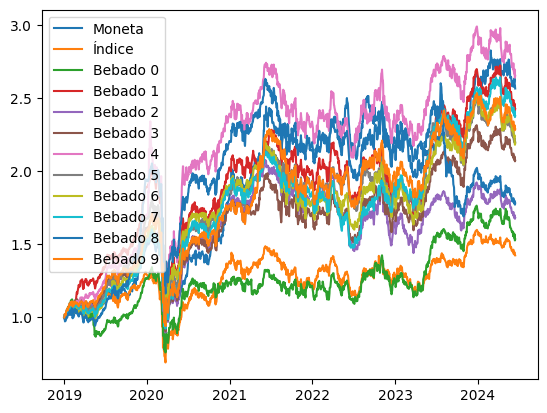

In [59]:
# mostrando graficamente os resultados acumulados dos retornos periódicos de todas as carteiras aleatórias
# e do moneta e do indice

(1 + retornos_jungidos_moneta).cumprod().plot()
(1 + retornos_jungidos_index).cumprod().plot()

(1 + bebados_jungidos[0]).cumprod().plot()
(1 + bebados_jungidos[1]).cumprod().plot()
(1 + bebados_jungidos[2]).cumprod().plot()
(1 + bebados_jungidos[3]).cumprod().plot()
(1 + bebados_jungidos[4]).cumprod().plot()
(1 + bebados_jungidos[5]).cumprod().plot()
(1 + bebados_jungidos[6]).cumprod().plot()
(1 + bebados_jungidos[7]).cumprod().plot()
(1 + bebados_jungidos[8]).cumprod().plot()
(1 + bebados_jungidos[9]).cumprod().plot()

plt.legend(["Moneta", "Índice"] + [f"Bebado {i}" for i in range(qtd_bebados)])